In [57]:
import pandas as pd

In [58]:
df=pd.read_csv(r'D:\guvi\final project\TSLA.csv')

In [59]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [60]:
df.shape

(2416, 7)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [62]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [63]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [64]:
#no null value is present in our data

In [65]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [66]:
''' our main focus on close column  becuase this column is target column '''

' our main focus on close column  becuase this column is target column '

In [67]:
#step 2 - preprocessing data 

In [68]:
# Feature Selection

In [69]:
'''Convert the Date column to a datetime format if necessary and set it as the
index. '''

'Convert the Date column to a datetime format if necessary and set it as the\nindex. '

In [70]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)  # Ensure time order

In [71]:
data = df[['Close']].copy()

In [72]:
data.head()

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001


In [73]:
#Scaling the Data
# Scale the Data using MinMaxScaler

In [74]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [75]:
scaled_data

array([[0.01058623],
       [0.01050772],
       [0.00806072],
       ...,
       [0.81786181],
       [0.83063335],
       [1.        ]])

In [76]:
#Create Time-Series Sequences (60-day window example)

In [77]:
import numpy as np

def create_sequences(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i, 0])  # past 60 days
        y.append(data[i, 0])  # next day
    return np.array(X), np.array(y)

window_size = 60
X, y = create_sequences(scaled_data, window_size)

In [78]:
X

array([[1.05862327e-02, 1.05077205e-02, 8.06071578e-03, ...,
        6.88301361e-03, 6.50353311e-03, 5.32583224e-03],
       [1.05077205e-02, 8.06071578e-03, 4.44909840e-03, ...,
        6.50353311e-03, 5.32583224e-03, 4.92017666e-03],
       [8.06071578e-03, 4.44909840e-03, 4.05654279e-04, ...,
        5.32583224e-03, 4.92017666e-03, 5.62679927e-03],
       ...,
       [3.89309079e-01, 3.94752684e-01, 3.94425544e-01, ...,
        7.09526328e-01, 7.21146328e-01, 7.39583865e-01],
       [3.94752684e-01, 3.94425544e-01, 4.06673629e-01, ...,
        7.21146328e-01, 7.39583865e-01, 8.17861814e-01],
       [3.94425544e-01, 4.06673629e-01, 4.18398337e-01, ...,
        7.39583865e-01, 8.17861814e-01, 8.30633351e-01]])

In [79]:
y

array([0.00492018, 0.0056268 , 0.00618948, ..., 0.81786181, 0.83063335,
       1.        ])

In [80]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # [samples, timesteps, features]

In [81]:
X

array([[[1.05862327e-02],
        [1.05077205e-02],
        [8.06071578e-03],
        ...,
        [6.88301361e-03],
        [6.50353311e-03],
        [5.32583224e-03]],

       [[1.05077205e-02],
        [8.06071578e-03],
        [4.44909840e-03],
        ...,
        [6.50353311e-03],
        [5.32583224e-03],
        [4.92017666e-03]],

       [[8.06071578e-03],
        [4.44909840e-03],
        [4.05654279e-04],
        ...,
        [5.32583224e-03],
        [4.92017666e-03],
        [5.62679927e-03]],

       ...,

       [[3.89309079e-01],
        [3.94752684e-01],
        [3.94425544e-01],
        ...,
        [7.09526328e-01],
        [7.21146328e-01],
        [7.39583865e-01]],

       [[3.94752684e-01],
        [3.94425544e-01],
        [4.06673629e-01],
        ...,
        [7.21146328e-01],
        [7.39583865e-01],
        [8.17861814e-01]],

       [[3.94425544e-01],
        [4.06673629e-01],
        [4.18398337e-01],
        ...,
        [7.39583865e-01],
        [8.1786

In [82]:
#Split into Train/Test

In [83]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [84]:
# step 3- Model Building – SimpleRNN & LSTM

In [85]:
#important libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [86]:
#1. SimpleRNN Model

In [87]:
# Define SimpleRNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(1))

# Compile
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train
history_rnn = model_rnn.fit(X_train, y_train, validation_data=(X_test, y_test),
                            epochs=50, batch_size=32, callbacks=[early_stop], verbose=1)

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - loss: 0.0835 - val_loss: 0.0053
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0029 - val_loss: 0.0042
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0022 - val_loss: 0.0043
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0017 - val_loss: 0.0034
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0020 - val_loss: 0.0029
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 9.7976e-04 - val_loss: 0.0021
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 8.8348e-04 - val_loss: 0.0023
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 9.0128e-04 - val_loss: 0.0021
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 8.0551e-04 - val_loss: 0.0017
Epoch 12/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/

In [88]:
#2.LSTM Model

In [89]:
# Define LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))

# Compile
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train
history_lstm = model_lstm.fit(X_train, y_train, validation_data=(X_test, y_test),
                              epochs=50, batch_size=32, callbacks=[early_stop], verbose=1)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - loss: 0.0164 - val_loss: 9.0216e-04
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 8.3289e-04 - val_loss: 9.8509e-04
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 6.2399e-04 - val_loss: 9.9992e-04
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 5.7617e-04 - val_loss: 0.0010
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 5.5989e-04 - val_loss: 0.0011
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 4.8976e-04 - val_loss: 0.0015
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 6.1828e-04 - val_loss: 9.3458e-04
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 4.2255e-04 - val_loss: 0.0011
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 4.7091e-04 - val_loss: 8.2787e-04
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 4.4311e-04 - val_loss: 7.5109e-04


In [90]:
# Evaluation – Prediction & Plotting

In [91]:
# Predict
pred_rnn = model_rnn.predict(X_test)
pred_lstm = model_lstm.predict(X_test)

# Inverse scaling
pred_rnn = scaler.inverse_transform(pred_rnn)
pred_lstm = scaler.inverse_transform(pred_lstm)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 867ms/step


In [92]:
# Plot Actual vs Predicted

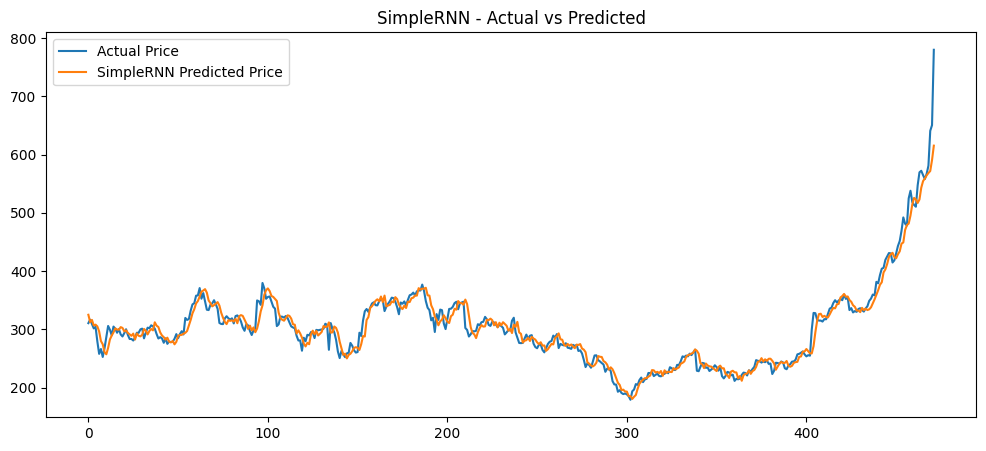

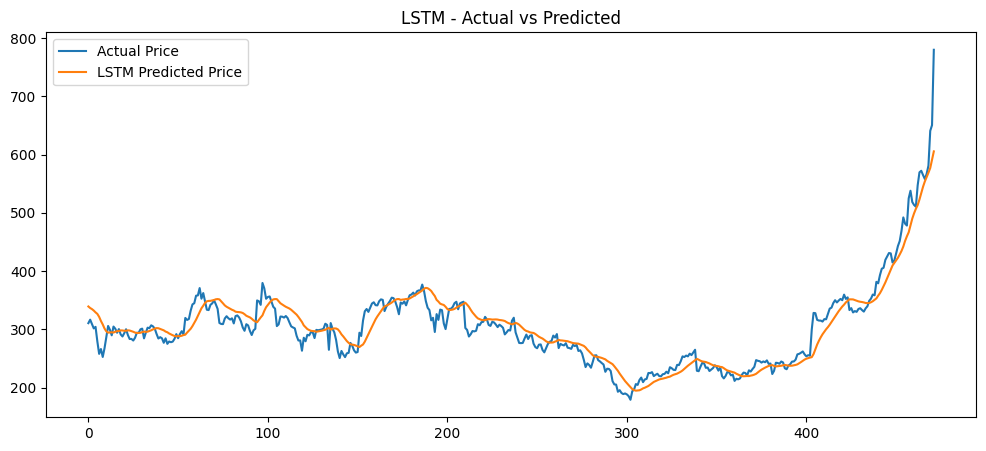

In [93]:
# Plot RNN predictions
plt.figure(figsize=(12, 5))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(pred_rnn, label='SimpleRNN Predicted Price')
plt.title('SimpleRNN - Actual vs Predicted')
plt.legend()
plt.show()

# Plot LSTM predictions
plt.figure(figsize=(12, 5))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(pred_lstm, label='LSTM Predicted Price')
plt.title('LSTM - Actual vs Predicted')
plt.legend()
plt.show()

In [94]:
#MSE Comparison

In [95]:
mse_rnn = mean_squared_error(y_test_actual, pred_rnn)
mse_lstm = mean_squared_error(y_test_actual, pred_lstm)

print(f"SimpleRNN MSE: {mse_rnn:.4f}")
print(f"LSTM MSE: {mse_lstm:.4f}")

SimpleRNN MSE: 264.8076
LSTM MSE: 526.8626


In [96]:
import numpy as np

def create_multistep_sequences(data, window_size, forecast_horizon):
    X, y = [], []
    for i in range(window_size, len(data) - forecast_horizon + 1):
        X.append(data[i - window_size:i, 0])
        y.append(data[i:i + forecast_horizon, 0])
    return np.array(X), np.array(y)

In [97]:
from sklearn.preprocessing import MinMaxScaler

# scale
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close']])

window_size = 60

# 1-day
X1, y1 = create_multistep_sequences(scaled_data, window_size, 1)
X1 = X1.reshape(X1.shape[0], X1.shape[1], 1)
y1 = y1.reshape(-1, 1)

# 5-day
X5, y5 = create_multistep_sequences(scaled_data, window_size, 5)
X5 = X5.reshape(X5.shape[0], X5.shape[1], 1)

# 10-day
X10, y10 = create_multistep_sequences(scaled_data, window_size, 10)
X10 = X10.reshape(X10.shape[0], X10.shape[1], 1)


In [98]:
def train_test_split(X, y, ratio=0.8):
    split = int(ratio * len(X))
    return X[:split], X[split:], y[:split], y[split:]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5)
X10_train, X10_test, y10_train, y10_test = train_test_split(X10, y10)


In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

def build_lstm_model(output_steps):
    model = Sequential()
    model.add(LSTM(50, return_sequences=False, input_shape=(window_size, 1)))
    model.add(Dropout(0.2))
    model.add(Dense(output_steps))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [100]:
model1 = build_lstm_model(1)
model1.fit(X1_train, y1_train, epochs=50, batch_size=32, 
           validation_data=(X1_test, y1_test),
           callbacks=[EarlyStopping(patience=10)], verbose=1)


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - loss: 0.0192 - val_loss: 0.0013
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 9.0063e-04 - val_loss: 0.0015
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 7.6664e-04 - val_loss: 0.0012
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 7.9499e-04 - val_loss: 0.0012
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 6.3529e-04 - val_loss: 0.0012
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 6.2665e-04 - val_loss: 0.0011
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 5.7628e-04 - val_loss: 0.0013
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 4.7637e-04 - val_loss: 0.0010
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 5.2191e-04 - val_loss: 0.0010
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 4.7190e-04 - val_loss: 0.0010
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 4.4386e-04 - val_loss: 9.8197e-04
Epoch 12/50
59/59 

In [101]:
model5 = build_lstm_model(5)
model5.fit(X5_train, y5_train, epochs=50, batch_size=32,
           validation_data=(X5_test, y5_test),
           callbacks=[EarlyStopping(patience=10)], verbose=1)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - loss: 0.0214 - val_loss: 0.0017
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0013 - val_loss: 0.0018
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 9.4960e-04 - val_loss: 0.0014
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 8.4359e-04 - val_loss: 0.0014
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 8.6538e-04 - val_loss: 0.0013
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 7.7378e-04 - val_loss: 0.0015
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 7.1686e-04 - val_loss: 0.0012
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 6.8046e-04 - val_loss: 0.0012
Epoch 12/50
59/59 ━━━━━━━━━━━━━━━━━━━━

In [102]:
model10 = build_lstm_model(10)
model10.fit(X10_train, y10_train, epochs=50, batch_size=32,
            validation_data=(X10_test, y10_test),
            callbacks=[EarlyStopping(patience=10)], verbose=1)


Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - loss: 0.0219 - val_loss: 0.0027
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0019 - val_loss: 0.0026
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 9.4367e-04 - val_loss: 0.0020
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 9.0481e-04 - val_loss: 0.0018
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 8.5739e-04 - val_loss: 0.0020
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 7.8782e-04 - val_loss: 0.0018
Epoch 12/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms

In [103]:
# Predict
pred1 = model1.predict(X1_test)
pred5 = model5.predict(X5_test)
pred10 = model10.predict(X10_test)

# Inverse transform
pred1 = scaler.inverse_transform(pred1)
pred5 = scaler.inverse_transform(pred5)
pred10 = scaler.inverse_transform(pred10)

y1_test_inv = scaler.inverse_transform(y1_test)
y5_test_inv = scaler.inverse_transform(y5_test)
y10_test_inv = scaler.inverse_transform(y10_test)

# Calculate MSE
mse_1 = mean_squared_error(y1_test_inv, pred1)
mse_5 = mean_squared_error(y5_test_inv, pred5)
mse_10 = mean_squared_error(y10_test_inv, pred10)

print(f"LSTM - 1 Day MSE: {mse_1:.4f}")
print(f"LSTM - 5 Day MSE: {mse_5:.4f}")
print(f"LSTM - 10 Day MSE: {mse_10:.4f}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
LSTM - 1 Day MSE: 296.6564
LSTM - 5 Day MSE: 484.2554
LSTM - 10 Day MSE: 845.0565


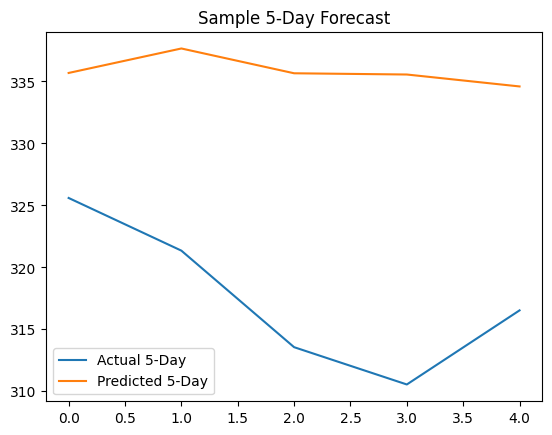

In [104]:
import matplotlib.pyplot as plt

plt.plot(y5_test_inv[0], label='Actual 5-Day')
plt.plot(pred5[0], label='Predicted 5-Day')
plt.title("Sample 5-Day Forecast")
plt.legend()
plt.show()


In [105]:
#day 1 prediction save csv

In [106]:
import pandas as pd
import numpy as np

# Suppose this is your predicted 1-day closing price array
# (already inverse transformed to original price scale)
# pred1.shape = (N, 1)
predicted_1day = pred1.flatten()  # Convert to 1D array
actual_1day = y1_test_inv.flatten()  # Actual closing prices

# Create DataFrame
df_1day = pd.DataFrame({
    'Actual_Close': actual_1day,
    'Predicted_Close_1Day': predicted_1day
})

# Save to CSV
df_1day.to_csv('LSTM_1Day_Prediction.csv', index=False)


In [107]:
#5 day  and 10 day prediction 

In [110]:
import pandas as pd

# Create empty dictionary to store columns
data_5day = {}

# Fill actual and predicted values for each day
for i in range(5):
    data_5day[f'Day{i+1}_Actual'] = y5_test_inv[:, i]
    data_5day[f'Day{i+1}_Predicted'] = pred5[:, i]

# Convert dictionary to DataFrame
df_5day = pd.DataFrame(data_5day)

# Save to CSV
df_5day.to_csv('LSTM_5Day_Prediction.csv', index=False)


In [111]:
# Create empty dictionary
data_10day = {}

# Fill actual and predicted values
for i in range(10):
    data_10day[f'Day{i+1}_Actual'] = y10_test_inv[:, i]
    data_10day[f'Day{i+1}_Predicted'] = pred10[:, i]

# Convert to DataFrame
df_10day = pd.DataFrame(data_10day)

# Save to CSV
df_10day.to_csv('LSTM_10Day_Prediction.csv', index=False)


In [112]:
#simplernn prediction file

In [113]:
import pandas as pd

# Flatten arrays
pred_rnn_flat = pred_rnn.flatten()
actual_rnn_flat = y_test_actual.flatten()

# Create DataFrame
df_rnn = pd.DataFrame({
    'Actual_Close': actual_rnn_flat,
    'Predicted_Close_SimpleRNN': pred_rnn_flat
})

# Save to CSV
df_rnn.to_csv('SimpleRNN_1Day_Prediction.csv', index=False)
